# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# set up lists to hold reponse info
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
when = []
found_cities = []


# Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
    try:
        
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        when.append(response['dt'])
        found_cities.append(city)
   
        print(response['id'],i,city)
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
        
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

2022572 0 khatanga
3361934 1 saldanha
148088 2 haftoni
6170031 3 tuktoyaktuk
3833367 4 ushuaia
5848280 5 kapaa
3430863 6 mar del plata
2450173 7 taoudenni
1572151 8 nha trang
2075265 9 busselton
5972291 10 havre-saint-pierre
3423146 11 ilulissat
3424607 12 tasiilaq
2171465 13 clarence town
2121385 14 severo-kurilsk
2177671 15 armidale
2065594 16 mount isa
1687894 17 santa rosa
1735106 18 georgetown
4030556 19 rikitea
2019488 20 namtsy
964420 21 port elizabeth
2163355 22 hobart
2206939 23 bluff
4020109 24 atuona
4726521 25 san patricio
3945985 26 camana
4756643 27 dumfries
Missing field/result... skipping.
3893726 29 constitucion
1513491 30 komsomolskiy
2145554 31 ulladulla
964432 32 port alfred
2063042 33 port hedland
2063056 34 port augusta
6201424 35 mataura
1507390 36 dikson
3369157 37 cape town
2638419 38 scarborough
Missing field/result... skipping.
2180815 40 tuatapere
3833883 41 trelew
1015776 42 bredasdorp
3874787 43 punta arenas
3418910 44 upernavik
3883457 45 lebu
4035715 46 

535639 370 letka
3416888 371 grindavik
6078372 372 moose factory
4074277 373 madison
4499379 374 wilmington
5024719 375 duluth
2688368 376 norrkoping
1279945 377 jiuquan
161616 378 balkanabat
3451138 379 rio grande
1178858 380 garhi khairo
3407357 381 araguaina
1649150 382 bengkulu
2012530 383 zhigansk
1266814 384 khed
3465487 385 coromandel
2063036 386 port lincoln
3372745 387 rabo de peixe
4887163 388 champaign
1061335 389 mananjary
1493004 390 sargatskoye
5427207 391 ken caryl
486413 392 suksun
Missing field/result... skipping.
4350461 394 carroll
2510573 395 teguise
Missing field/result... skipping.
2016307 397 solnechnyy
3170069 398 porto torres
3671450 399 inirida
3671497 400 puerto colombia
1729469 401 baculin
113659 402 tabas
3161456 403 bjerkvik
5225507 404 warwick
3397337 405 girau do ponciano
108410 406 riyadh
477940 407 ust-tsilma
2013279 408 vostok
5380437 409 pacific grove
5110365 410 broome
Missing field/result... skipping.
932987 412 tsabong
3374210 413 sao filipe
61629

In [5]:
weather = {
    "city": found_cities,
    "lat": lat,
    "long": lng,
    "max_temp": max_temp,
    "humidity":hum,
    "cloudiness":cloud,
    "wind_speed":wind,
    "country":country,
    "date":when
}
weather_data = pd.DataFrame(weather)
weather_data.head()

,city,lat,long,max_temp,humidity,cloudiness,wind_speed,country,date
0,khatanga,71.9667,102.5000,86.61,42,59,10.92,RU,1627383071
1,saldanha,-33.0117,17.9442,60.85,75,22,17.92,ZA,1627383130
2,haftoni,38.7632,48.7622,93.99,45,40,13.80,AZ,1627383130
3,tuktoyaktuk,69.4541,-133.0374,45.01,76,100,8.52,CA,1627383130
4,ushuaia,-54.8000,-68.3000,35.26,87,75,4.61,AR,1627383130


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data.to_csv("output_data/CityData.csv", index=False)

In [9]:
weather_data.describe()

,lat,long,max_temp,humidity,cloudiness,wind_speed,date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,21.295854,19.210580,70.713548,68.858423,52.962366,8.178925,1.627383e+09
std,33.932818,90.197059,15.013991,23.299002,38.199754,5.658440,1.190521e+02
min,-54.800000,-179.166700,31.950000,5.000000,0.000000,0.000000,1.627383e+09
25%,-6.790000,-62.584650,62.115000,54.250000,9.000000,3.945000,1.627383e+09
50%,28.366800,21.914850,72.645000,75.000000,61.000000,7.000000,1.627383e+09
75%,48.998700,101.566800,80.752500,87.000000,90.000000,11.405000,1.627383e+09
max,78.218600,179.316700,114.850000,100.000000,100.000000,29.710000,1.627383e+09


In [10]:
first_d  = weather_data.iloc[0]['date']
first_d
w = datetime.fromtimestamp(first_d)
print(w)

2021-07-27 06:51:11


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
hum_cities = weather_data.loc[weather_data['humidity']>100]
n_hum_cities = len(hum_cities)
print(f'Number of cities wiht > 100% humidity in the list is {n_hum_cities}')


Number of cities wiht > 100% humidity in the list is 0


In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

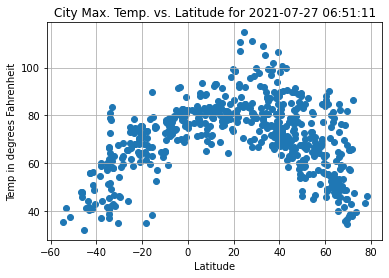

In [14]:
# Scatter plot Temp v latitude
x_vals = weather_data['lat']
y_vals = weather_data['max_temp']
plt.scatter(x_vals,y_vals)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Temp in degrees Fahrenheit')
plt.title(f'City Max. Temp. vs. Latitude for {w}')


plt.savefig('Images/Temp_v_Latitude_Scatter.png')
plt.show()

### Scatter Plot of City Temperatures vs. Latitude shows maximum temperatures between 20 - 40 degrees latittude.

## Latitude vs. Humidity Plot

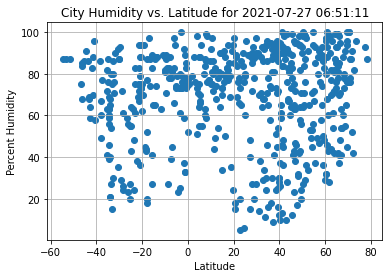

In [15]:
# Scatter plot Temp v Humidity
x_vals = weather_data['lat']
y_vals = weather_data['humidity']
plt.scatter(x_vals,y_vals)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Percent Humidity')
plt.title(f'City Humidity vs. Latitude for {w}')
plt.savefig('Images/Humidity_v_Latitude_Scatter.png')

plt.show()

### Plot of humidity vs Latitude does not show an obvious correlation.

## Latitude vs. Cloudiness Plot

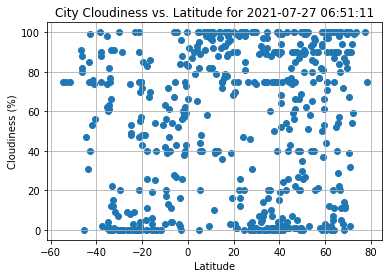

In [16]:
# Scatter plot Temp v Cloudiness
x_vals = weather_data['lat']
y_vals = weather_data['cloudiness']
plt.scatter(x_vals,y_vals)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Cloudiness vs. Latitude for {w}')
plt.savefig('Images/Cloudiness_v_Latitude_Scatter.png')

plt.show()

## Latitude vs. Wind Speed Plot

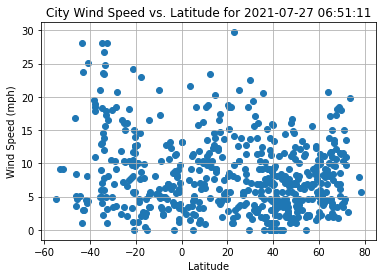

In [17]:
# Scatter plot Temp v Humidity
x_vals = weather_data['lat']
y_vals = weather_data['wind_speed']
plt.scatter(x_vals,y_vals)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Wind Speed vs. Latitude for {w}')
plt.savefig('Images/WindSpeed_v_Latitude_Scatter.png')

plt.show()

### Wind Speed does not correlate to City Latitude on this day.

## Linear Regression

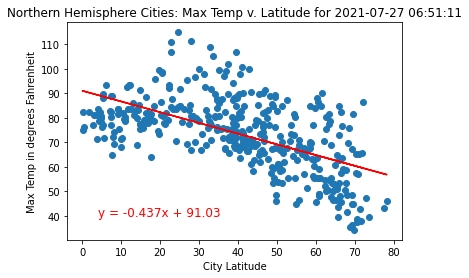

 R-value : -0.5831762392120093; P-value: 8.120430707208106e-37


In [18]:
north = weather_data.loc[weather_data['lat']>0]
x = north['lat']
y = north['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(4,40),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Max Temp in degrees Fahrenheit')
plt.title(f'Northern Hemisphere Cities: Max Temp v. Latitude for {w}')


plt.savefig('Images/Northern Temp Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

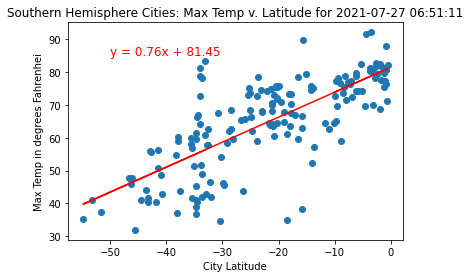

 R-value : 0.7402855174870333; P-value: 1.320323082570434e-30


In [19]:
south = weather_data.loc[weather_data['lat']<0]
x = south['lat']
y = south['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-50,85),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Max Temp in degrees Fahrenhei')
plt.title(f'Southern Hemisphere Cities: Max Temp v. Latitude for {w}')


plt.savefig('Images/Southern Temp Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

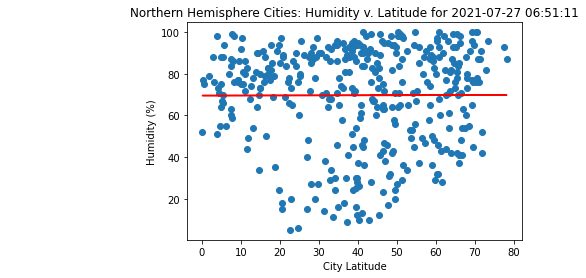

 R-value : 0.00197516056670263; P-value: 0.9690251870619258


In [20]:
north = weather_data.loc[weather_data['lat']>0]
x = north['lat']
y = north['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-50,25),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere Cities: Humidity v. Latitude for {w}')


plt.savefig('Images/Northern Humidity Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

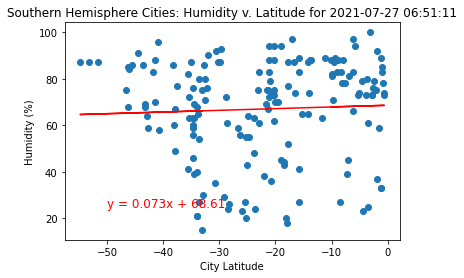

 R-value : 0.04640723790723264; P-value: 0.5490798438961029


In [21]:
south = weather_data.loc[weather_data['lat']<0]
x = south['lat']
y = south['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-50,25),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere Cities: Humidity v. Latitude for {w}')


plt.savefig('Images/Southern Humidity Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

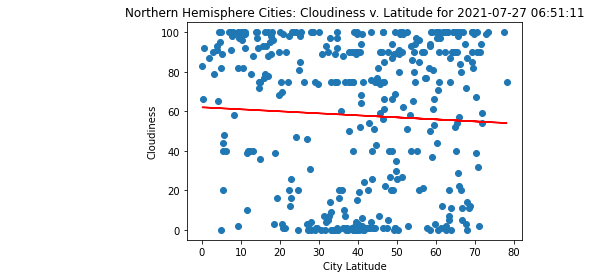

 R-value : -0.051405676845216845; P-value: 0.31188033747096555


In [22]:
north = weather_data.loc[weather_data['lat']>0]
x = north['lat']
y = north['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-50,25),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere Cities: Cloudiness v. Latitude for {w}')


plt.savefig('Images/Northern Cloudiness Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

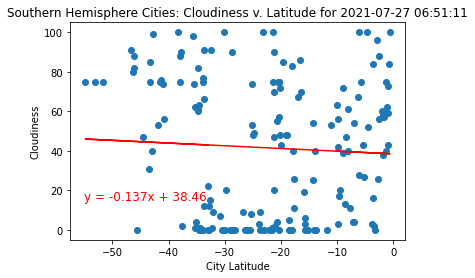

 R-value : -0.05397997118875702; P-value: 0.4857778070236236


In [23]:
south = weather_data.loc[weather_data['lat']<0]
x = south['lat']
y = south['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-55,15),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere Cities: Cloudiness v. Latitude for {w}')


plt.savefig('Images/Southern Cloudiness Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

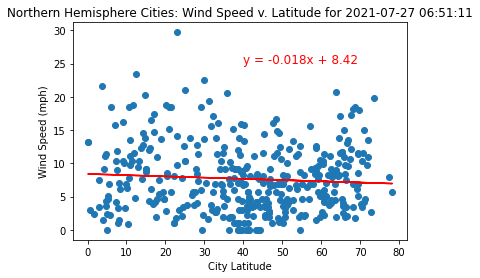

 R-value : -0.07043172322480341; P-value: 0.1656301337153969


In [24]:
north = weather_data.loc[weather_data['lat']>0]
x = north['lat']
y = north['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(40,25),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Cities: Wind Speed v. Latitude for {w}')


plt.savefig('Images/Northern Wind Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

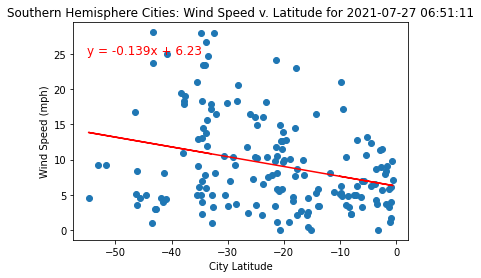

 R-value : -0.2877825053654589; P-value: 0.00014824774885086785


In [25]:
south = weather_data.loc[weather_data['lat']<0]
x = south['lat']
y = south['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-55,25),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Cities: Wind Speed v. Latitude for {w}')


plt.savefig('Images/Southern Wind Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')